In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Data from csv file

In [3]:
df = pd.read_csv('AAPL.csv')
df.tail()

Date        Open        High         Low       Close   Adj Close  \
2006  23-12-2019  280.529999  284.250000  280.369995  284.000000  282.054138   
2007  24-12-2019  284.690002  284.890015  282.920013  284.269989  282.322266   
2008  26-12-2019  284.820007  289.980011  284.700012  289.910004  287.923645   
2009  27-12-2019  291.119995  293.970001  288.119995  289.799988  287.814392   
2010  30-12-2019  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # specify the correct format
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0 2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1 2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2 2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3 2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4 2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [6]:
df.set_index('Date', inplace=True)

#### Volume = it indicates how actively stock traddng , it shows public intrest 
#### Adj Close = Close price adjusted

In [7]:
df.shape

(2011, 6)

In [8]:
round(df.describe().T,1)

count        mean         std         min         25%         50%  \
Open       2011.0       126.7        50.5        55.4        85.9       113.1   
High       2011.0       127.8        50.9        57.1        86.7       114.2   
Low        2011.0       125.6        50.1        55.0        85.1       111.9   
Close      2011.0       126.7        50.6        55.8        86.2       113.1   
Adj Close  2011.0       119.5        52.4        48.9        75.1       105.2   
Volume     2011.0  59496704.7  46838558.5  11362000.0  27585650.0  43469000.0   

                  75%          max  
Open            165.2        291.1  
High            167.4        294.0  
Low             163.4        288.1  
Close           165.2        291.5  
Adj Close       160.0        289.5  
Volume     74710300.0  376530000.0

**No missing values are present**

### Inferences 

#### The mean values for Open, High, Low, and Close prices are relatively close to each other, indicating consistency across these price metrics.

#### Volume data has a wide range

### Line Plot

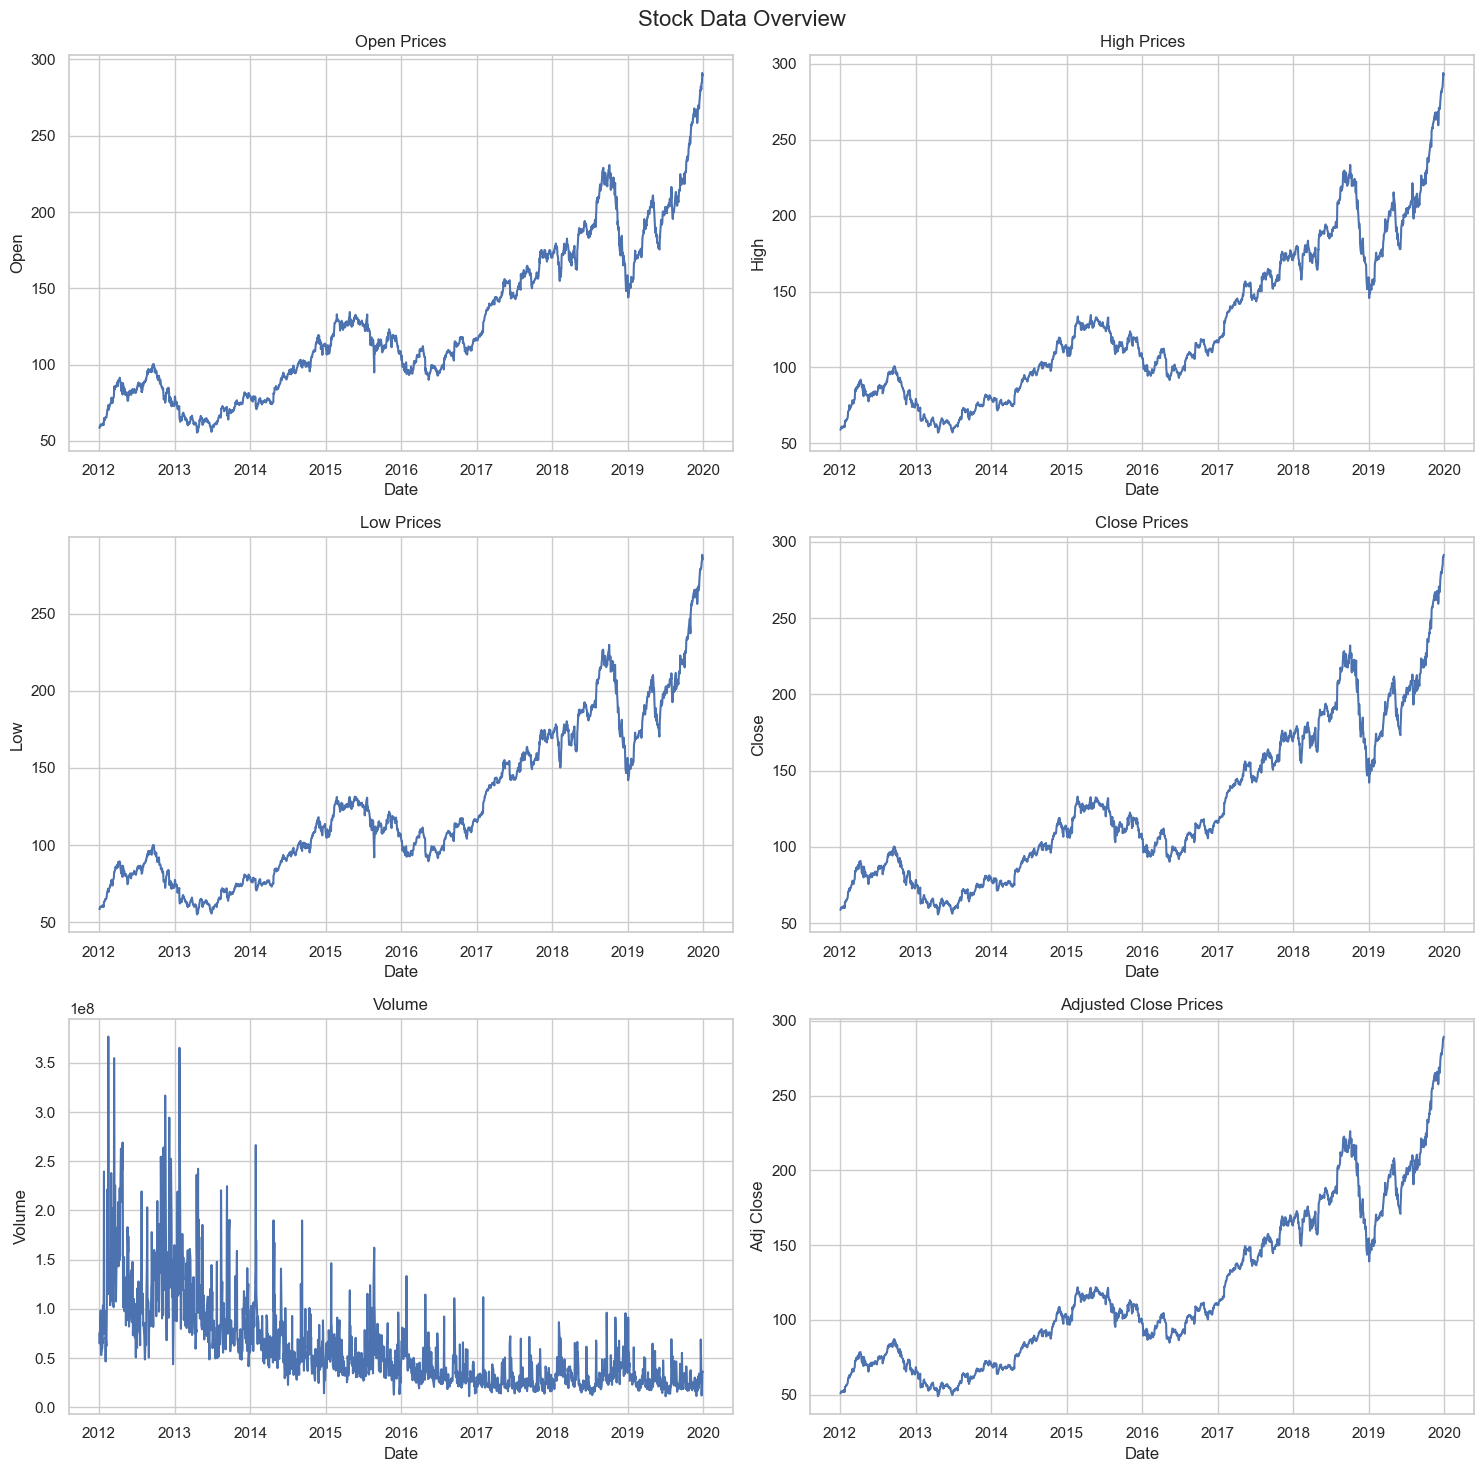

In [9]:
sns.set(style="whitegrid")
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Stock Data Overview', fontsize=16)

# Plot Open prices
sns.lineplot(ax=axes[0, 0], x='Date', y='Open', data=df)
axes[0, 0].set_title('Open Prices')

# Plot High prices
sns.lineplot(ax=axes[0, 1], x='Date', y='High', data=df)
axes[0, 1].set_title('High Prices')

# Plot Low prices
sns.lineplot(ax=axes[1, 0], x='Date', y='Low', data=df)
axes[1, 0].set_title('Low Prices')

# Plot Close prices
sns.lineplot(ax=axes[1, 1], x='Date', y='Close', data=df)
axes[1, 1].set_title('Close Prices')

# Plot Volume
sns.lineplot(ax=axes[2, 0], x='Date', y='Volume', data=df)
axes[2, 0].set_title('Volume')

# Plot Adjusted Close prices
sns.lineplot(ax=axes[2, 1], x='Date', y='Adj Close', data=df)
axes[2, 1].set_title('Adjusted Close Prices')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Distribution Plot

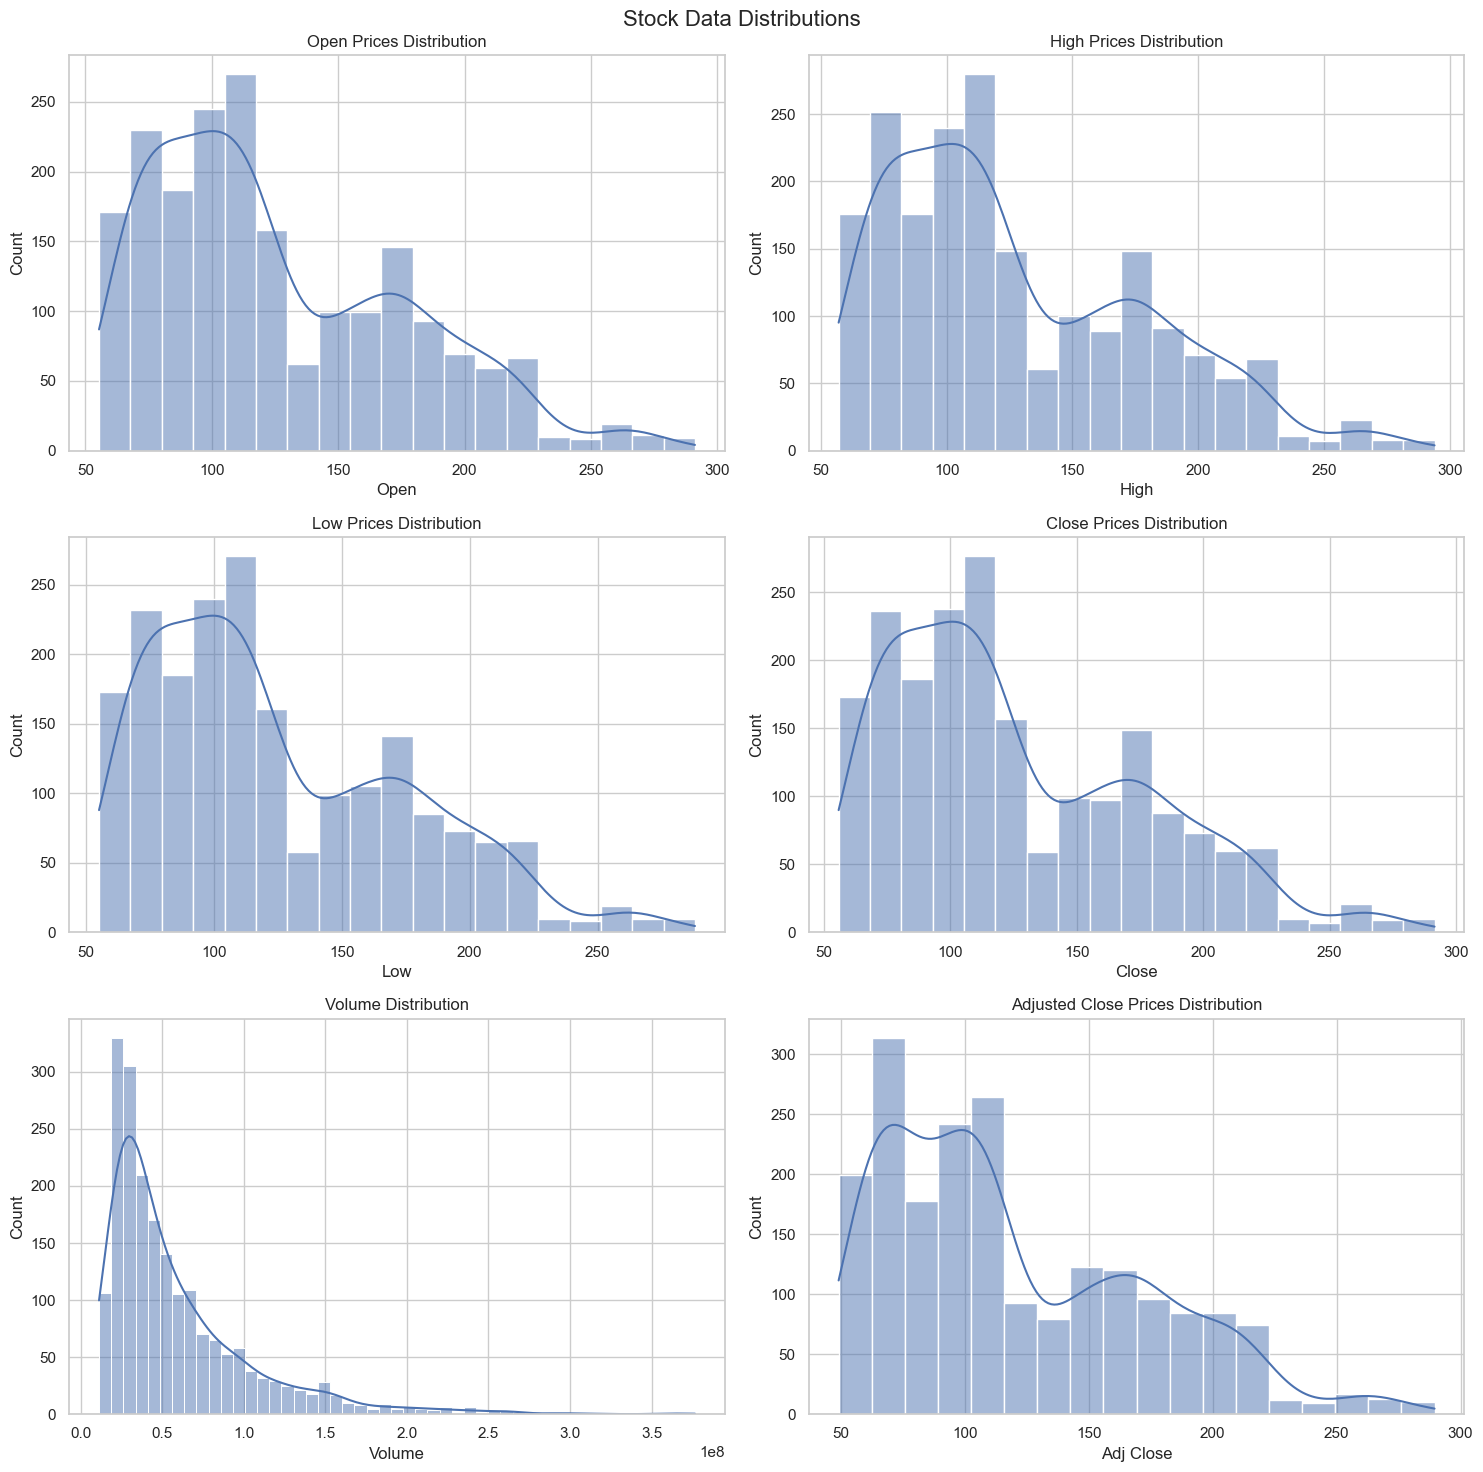

In [10]:
# Set the style

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Stock Data Distributions', fontsize=16)

# Plot Open prices distribution
sns.histplot(df['Open'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Open Prices Distribution')

# Plot High prices distribution
sns.histplot(df['High'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('High Prices Distribution')

# Plot Low prices distribution
sns.histplot(df['Low'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Low Prices Distribution')

# Plot Close prices distribution
sns.histplot(df['Close'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Close Prices Distribution')

# Plot Volume distribution
sns.histplot(df['Volume'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Volume Distribution')

# Plot Adjusted Close prices distribution
sns.histplot(df['Adj Close'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Adjusted Close Prices Distribution')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Inference from Lineplot and Dist plot

#### Line Plot: overall strong consistence in upward trend.

#### Distribution is skewed towards the right, it indicates that positive price changes are more frequent.

#### Overall Decreasing volume along with upward price trend due to some reasons.

### Daily percentage change in closing prices.

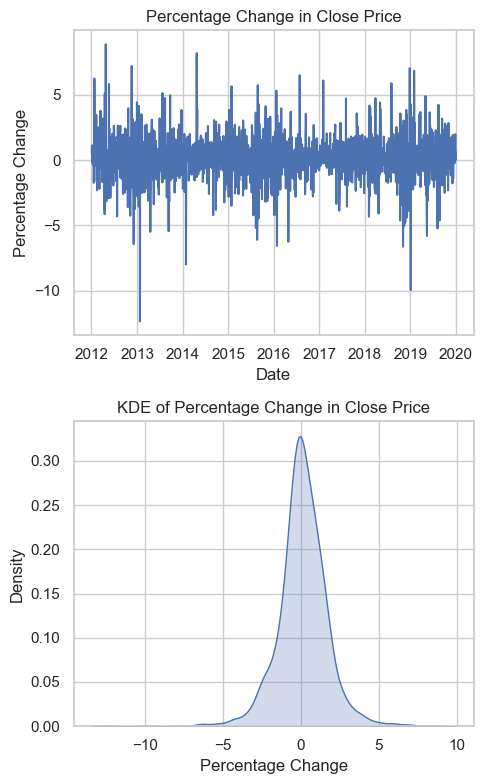

In [11]:
# Assuming df is your DataFrame
# Calculate percentage change
df['PctChangeClose'] = df['Close'].pct_change(periods=1) * 100

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Line plot for PctChangeClose
ax[0].plot(df['PctChangeClose'])
ax[0].set_title('Percentage Change in Close Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Percentage Change')

# KDE plot for PctChangeClose
sns.kdeplot(df['PctChangeClose'], fill=True, ax=ax[1])
ax[1].set_title('KDE of Percentage Change in Close Price')
ax[1].set_xlabel('Percentage Change')

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...                ...         ...         ...         ...         ...   
2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

              Volume  PctChangeClose  
Date                                  
2012-01-03  75555200             NaN  
2012-01-04  65005500        0.537415  
2012-01-05  67817400        1.110193  
2012-01-06  79573200        1.045380  
2012-01-09  98506100       -0.158617  
...              ...             ...  
2019-12-23  24643000        1.631834  
2019-12-24  12119700        0.095067  
2019-12-26  23280300        1.984035  
2019-12-27  36566500       -0.037948  
2019-12-30  36028600        0.593513  

[2011 rows x 7 columns]

#### It indicates daily fluctuations in stock.
#### Highest Positive close price change 8.87 % which indicates a recovery or positive sentiment in the market.
#### Highest Negative close price change -12.35579 % which indicates negative or bad market conditions or any other reason.
#### Avg Daily Price Change(Mean) 0.092 %
#### On and Average Daily Price Change(STD)(68 % Confidence) = +- 1.612 % , stock is consistence, it gives me high confidenct to invest
#### On and avg daily percentage fluctuation is less. 

### Time Series Components 

In [13]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

print("Moving Averages (10-day and 50-day):")
print(df[['MA10', 'MA50']].tail())


Moving Averages (10-day and 50-day):
                  MA10      MA50
Date                            
2019-12-23  276.932996  259.6744
2019-12-24  278.511993  260.6424
2019-12-26  280.425995  261.7342
2019-12-27  282.259995  262.8428
2019-12-30  283.896994  263.9676


### 10-day moving average goes above the 50-day moving average, 
### it means recent prices are higher than usual,which is considered positive stockexchange rate and it indicate a continuation of the upward trend in prices.

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_data=seasonal_decompose(df['Close'],model='multiplicative', period=365)

### Plot of Time Series Components present in Close price of stock exchange 

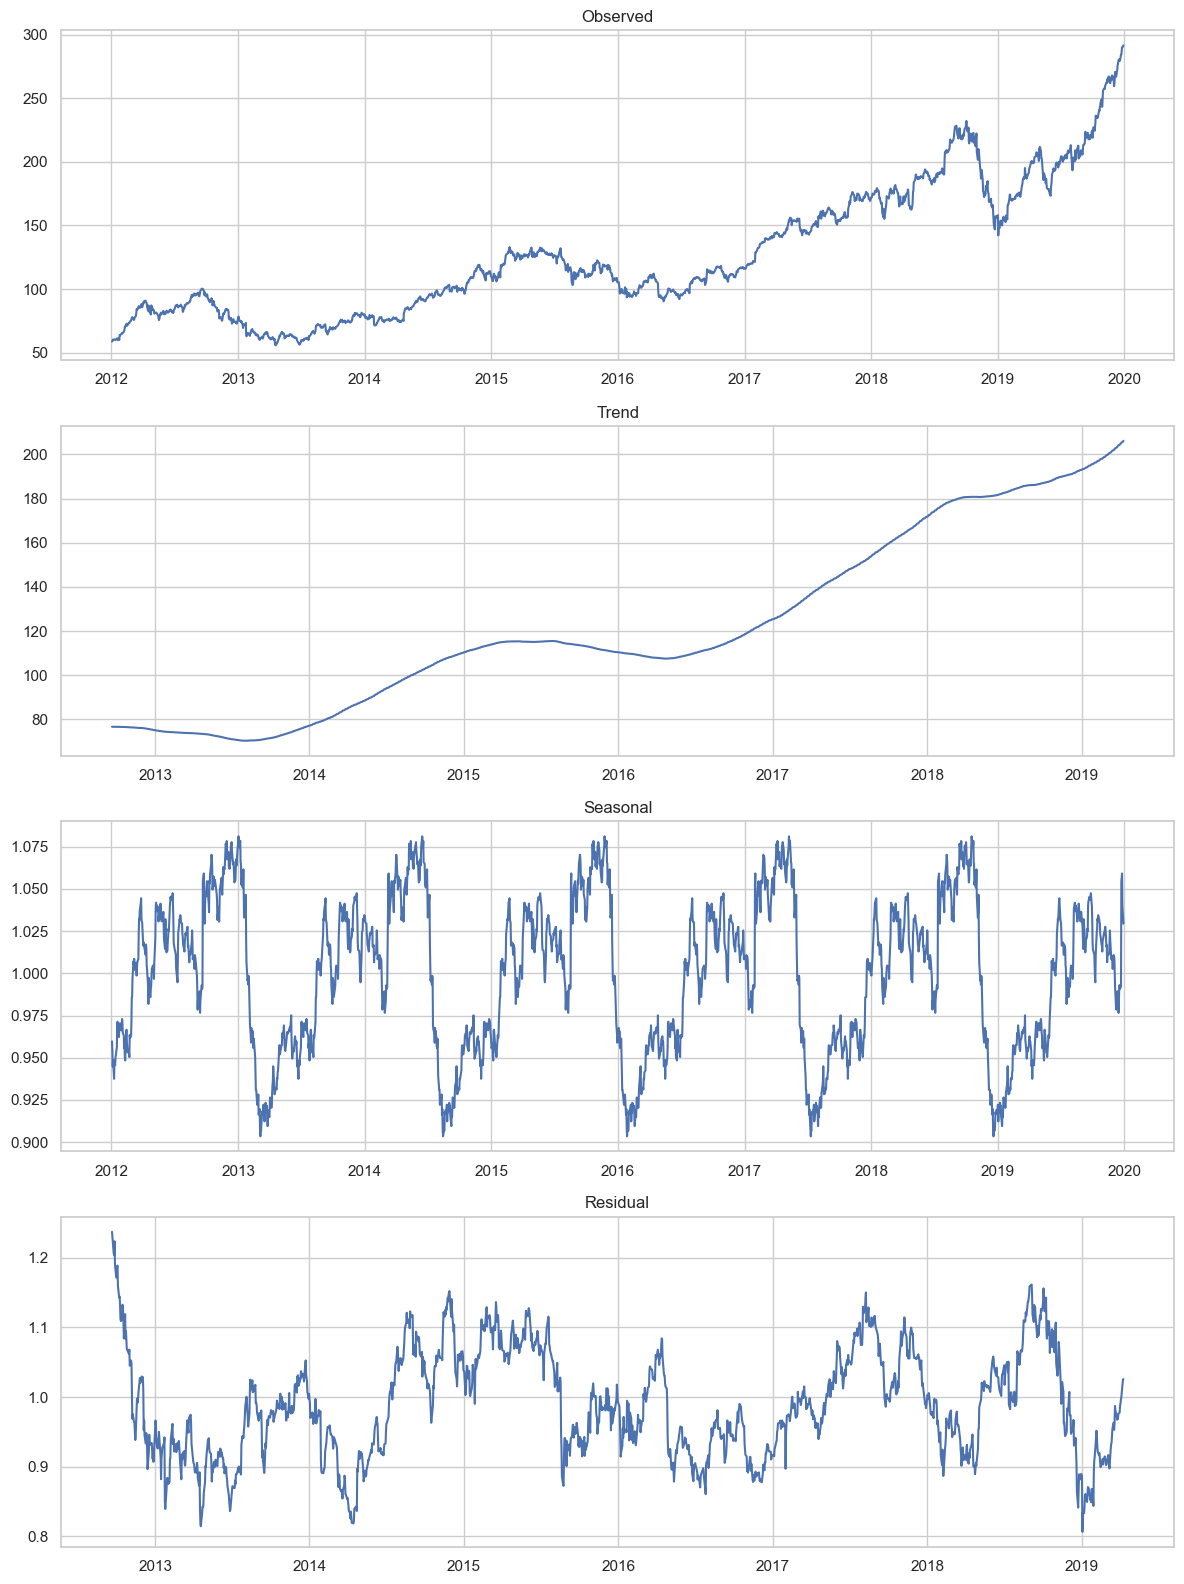

In [15]:
result = seasonal_decompose(df['Close'], model='multiplicative',period=365)

# Set the figure size
plt.figure(figsize=(12, 16))

# Plot observed, trend, seasonal, and residual components
plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**The price of stocks from 2012 to 2019 shows an overall increasing trend, indicating potential long-term growth opportunities**

**Trend -- Growth Potential: The upward trend suggests the stock has been consistently increasing in value, potentially offering growth opportunities**

**Seasonality -- Seasonal Influence: apple stocks shows predictable patterns at certain times, likely influenced by seasonal factors.**


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

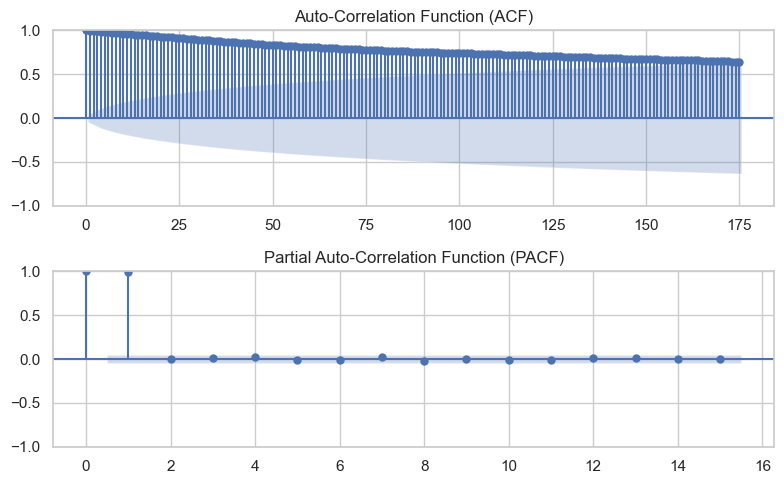

In [17]:
# Resample data to business day frequency, forward fill any missing values
df = df.resample('B').ffill()

# Plot ACF and PACF8
plt.figure(figsize=(8, 5))

# ACF
plt.subplot(211)
plot_acf(df['Close'], lags=175, ax=plt.gca())
plt.title('Auto-Correlation Function (ACF)')

# PACF
plt.subplot(212)
plot_pacf(df['Close'], lags=15, ax=plt.gca())
plt.title('Partial Auto-Correlation Function (PACF)')

plt.tight_layout()
plt.show()

### ACF Inference

**Long-Term Correlationat: The ACF plot shows significant correlations extending up to lag 167. This indicates that the stock prices exhibit long-term dependencies, meaning that past values (up to approximately 167 days) have a significant influence on current values.**

**Seasonality and Persistence: The long support in the ACF suggests potential seasonal effects or persistent long-term trends in the stock prices. It could mean that the stock exhibits seasonal cycles, such as quarterly or annual patterns, or that there is a strong momentum effect where past trends tend to persist over a longer period.**

### PACF Inference

**Lag-1 Dependency: The PACF plot shows that only lag-1 has a significant correlation, indicating that the next value of the stock exchange depends primarily on its immediate previous value. This suggests a strong short-term autoregressive component (AR(1) process), where today's closing price is a good predictor of tomorrow's closing price.**


## Moving Average

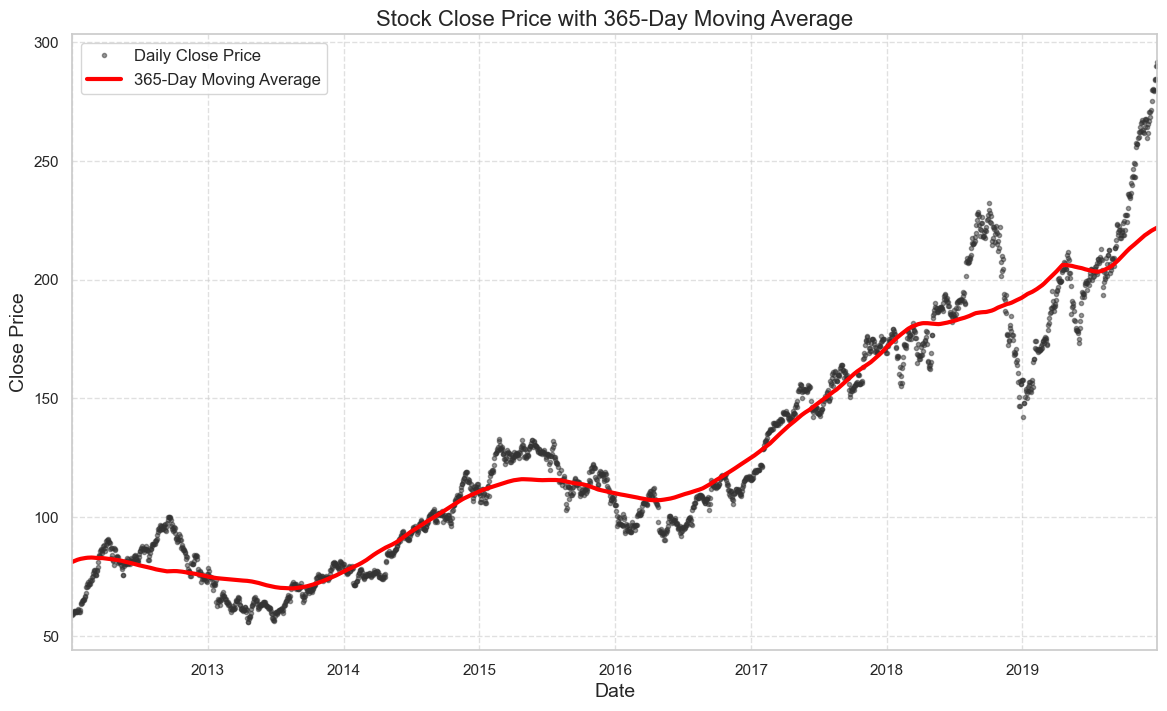

In [18]:
# Compute the 365-day moving average
moving_average = df['Close'].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=170,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

# Plotting
plt.figure(figsize=(14, 8))
ax = df['Close'].plot(style=".", color="0.2", label='Daily Close Price', alpha=0.5)
moving_average.plot(ax=ax, linewidth=3, color='red', label='365-Day Moving Average')

# Customizing the plot
plt.title("Stock Close Price with 365-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [19]:
df['Lag_1'] = df['Close'].shift(1)
df_ = df.reindex(columns=['Ex_rate', 'Lag_1'])
df_.head()

Ex_rate      Lag_1
Date                          
2012-01-03      NaN        NaN
2012-01-04      NaN  58.747143
2012-01-05      NaN  59.062859
2012-01-06      NaN  59.718571
2012-01-09      NaN  60.342857

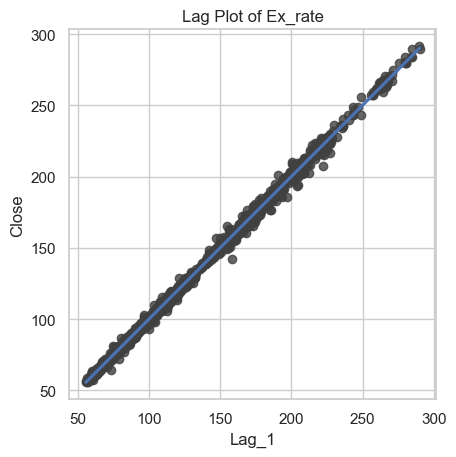

In [20]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Close', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Ex_rate');

In [21]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...                ...         ...         ...         ...         ...   
2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-25  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

              Volume  PctChangeClose        MA10      MA50       Lag_1  
Date                                                                    
2012-01-03  75555200             NaN         NaN       NaN         NaN  
2012-01-04  65005500        0.537415         NaN       NaN   58.747143  
2012-01-05  67817400        1.110193         NaN       NaN   59.062859  
2012-01-06  79573200        1.045380         NaN       NaN   59.718571  
2012-01-09  98506100       -0.158617         NaN       NaN   60.342857  
...              ...             ...         ...       ...         ...  
2019-12-24  12119700        0.095067  278.511993  260.6424  284.000000  
2019-12-25  12119700        0.095067  278.511993  260.6424  284.269989  
2019-12-26  23280300        1.984035  280.425995  261.7342  284.269989  
2019-12-27  36566500       -0.037948  282.259995  262.8428  289.910004  
2019-12-30  36028600        0.593513  283.896994  263.9676  289.799988  

[2085 rows x 10 columns]

### In the securities markets, volatility is often associated with big swings in either direction. For example, when the stock market rises and falls more than 1% over a sustained period of time, it is called a volatile market. An asset's volatility is a key factor when pricing options contracts.


In [22]:
df["month"] = df.index.strftime("%b") # month extraction
df["year"] = df.index.strftime("%Y") # year extraction

In [23]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...                ...         ...         ...         ...         ...   
2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-25  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

              Volume  PctChangeClose        MA10      MA50       Lag_1 month  \
Date                                                                           
2012-01-03  75555200             NaN         NaN       NaN         NaN   Jan   
2012-01-04  65005500        0.537415         NaN       NaN   58.747143   Jan   
2012-01-05  67817400        1.110193         NaN       NaN   59.062859   Jan   
2012-01-06  79573200        1.045380         NaN       NaN   59.718571   Jan   
2012-01-09  98506100       -0.158617         NaN       NaN   60.342857   Jan   
...              ...             ...         ...       ...         ...   ...   
2019-12-24  12119700        0.095067  278.511993  260.6424  284.000000   Dec   
2019-12-25  12119700        0.095067  278.511993  260.6424  284.269989   Dec   
2019-12-26  23280300        1.984035  280.425995  261.7342  284.269989   Dec   
2019-12-27  36566500       -0.037948  282.259995  262.8428  289.910004   Dec   
2019-12-30  36028600        0.593513  283.896994  263.9676  289.799988   Dec   

            year  
Date              
2012-01-03  2012  
2012-01-04  2012  
2012-01-05  2012  
2012-01-06  2012  
2012-01-09  2012  
...          ...  
2019-12-24  2019  
2019-12-25  2019  
2019-12-26  2019  
2019-12-27  2019  
2019-12-30  2019  

[2085 rows x 12 columns]

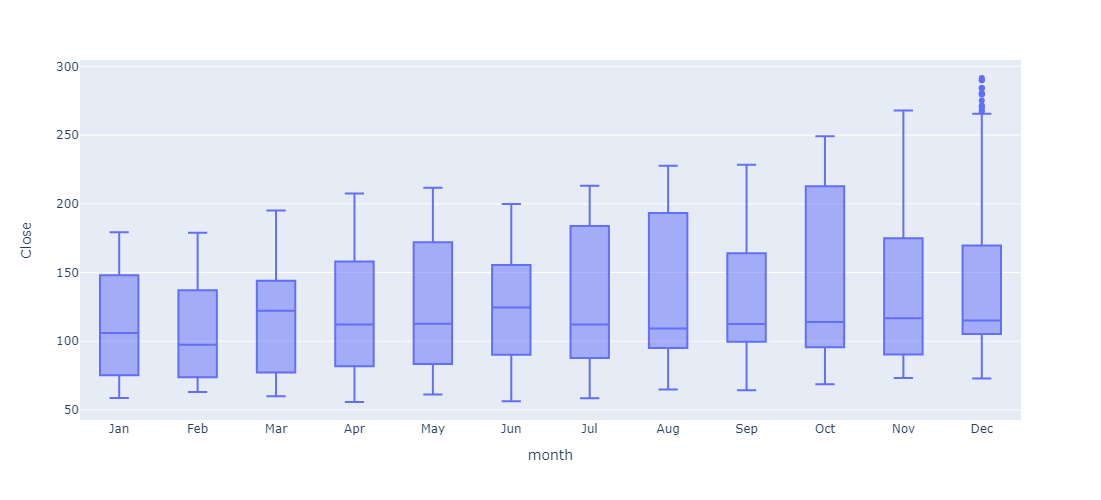

In [24]:
import plotly.express as px
fig = px.box(df, x='month', y='Close')
# Increase the size of the boxplot
fig.update_layout(width=1000, height=500)
fig.show()

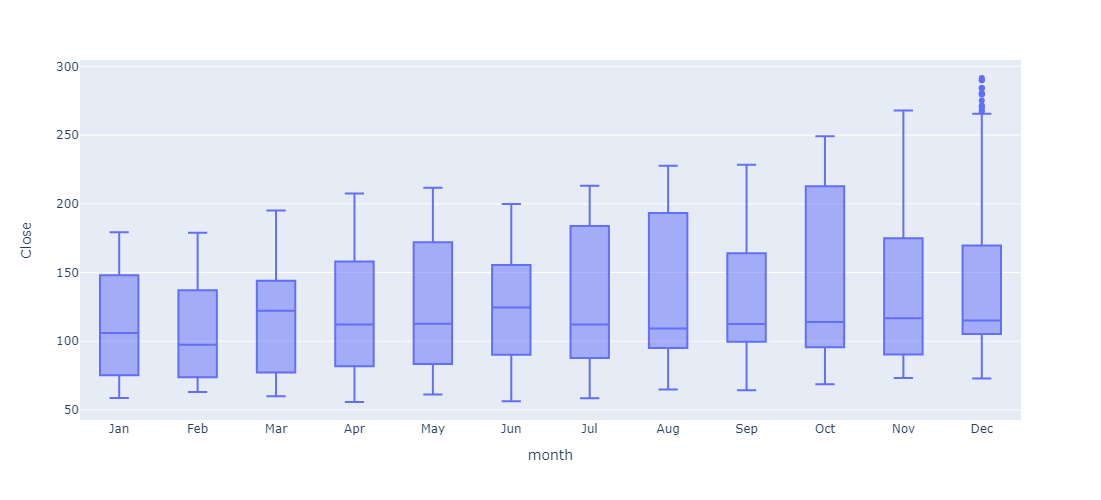

In [25]:
fig.update_layout(width=1000, height=500)
px.box(df,x='year', y='Close' )
fig.show()

## Data Preprocessing 

In [26]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    plt.figure(figsize=(12, 6))
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)
def adf_test(data):
    ## H0: Data is not Stationary
    ## H1: Data is Stationary
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

Results of Dickey-Fuller Test :

Test Statistic                    0.978428
p-value                           0.994033
#Lags Used                       26.000000
Number of Observations Used    2058.000000
Critical Value (1%)              -3.433531
Critical Value (5%)              -2.862945
Critical Value (10%)             -2.567518
dtype: float64
None
---------------------------------------------
Failed to reject the null hypothesis
Data is Not stationary
None
---------------------------------------------


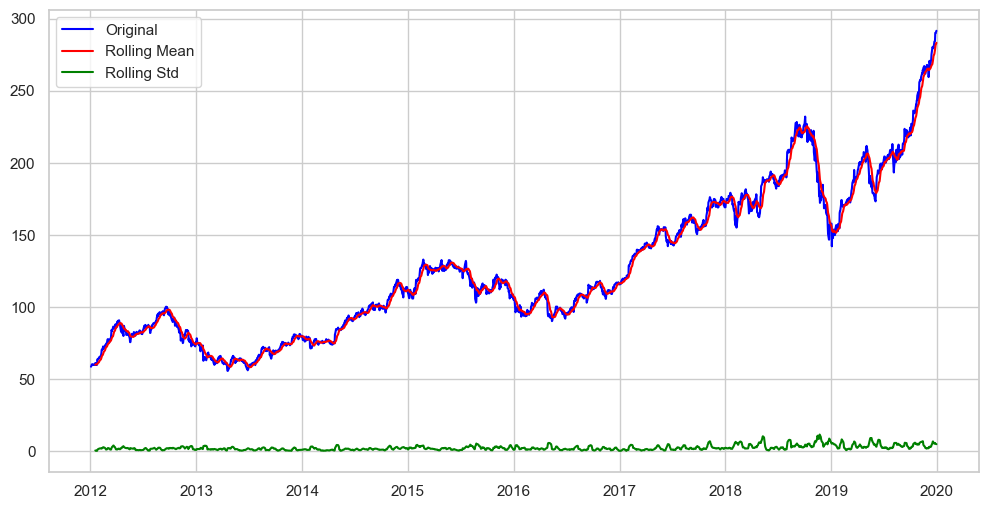

In [27]:
print(test_stationarity(df['Close']))
print("---------------------------------------------")
print(adf_test(df["Close"]))
print("---------------------------------------------")

### As we can see moving std deviation is stable so it indicates the stability of the market.

**addifuler test**
#####  H0: Data is not Stationary
#####  H1: Data is Stationary
#####  Result of hypo testing --> Test Statistics > Critical Value   
####  Fail to Reject null hypotesis, so my data is not stationary.

**Future prediction is difficult when our past and present data have fluctuations, so need to convert in costant form.**


In [28]:
from statsmodels.tsa.statespace.tools import diff
df_1 = diff(df["Close"],k_diff=1)
print(df_1)
### Check for stationarity
print("---------------------------------------------")
print(adf_test(df_1))

Date
2012-01-04    0.315716
2012-01-05    0.655712
2012-01-06    0.624286
2012-01-09   -0.095714
2012-01-10    0.215713
                ...   
2019-12-24    0.269989
2019-12-25    0.000000
2019-12-26    5.640015
2019-12-27   -0.110016
2019-12-30    1.720001
Freq: B, Name: Close, Length: 2084, dtype: float64
---------------------------------------------
Reject the null hypothesis
Data is stationary
None


Results of Dickey-Fuller Test :

Test Statistic                -7.644871e+00
p-value                        1.854085e-11
#Lags Used                     2.500000e+01
Number of Observations Used    2.058000e+03
Critical Value (1%)           -3.433531e+00
Critical Value (5%)           -2.862945e+00
Critical Value (10%)          -2.567518e+00
dtype: float64


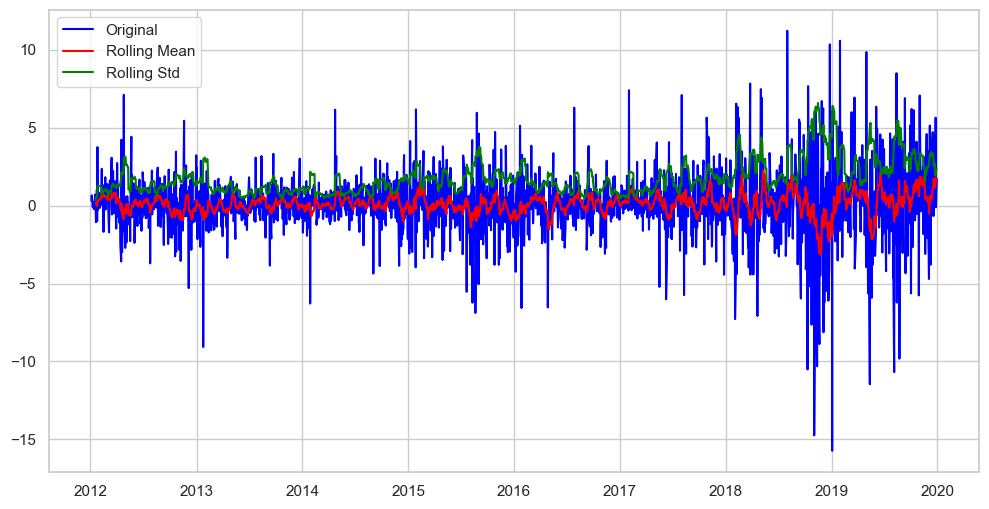

In [29]:
test_stationarity(df_1)

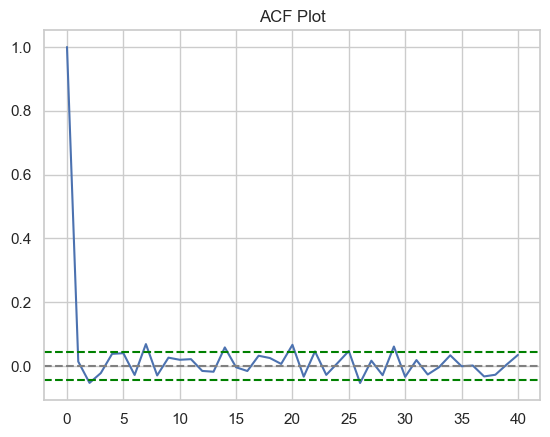

In [30]:
plt.plot(np.arange(0,41), acf(df_1, nlags = 40))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(df_1)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(df_1)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

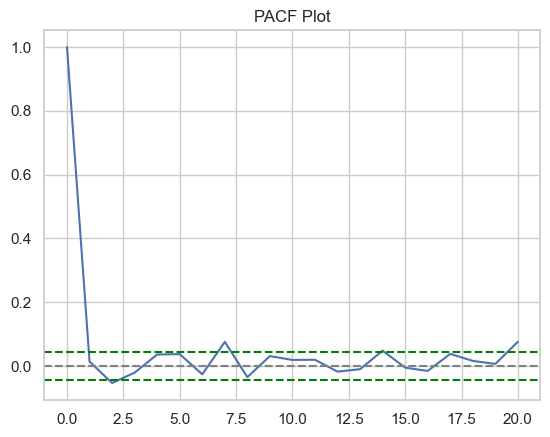

In [31]:
# Plotting the PACF curve

plt.plot(np.arange(0,21), pacf(df_1, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(df_1)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(df_1)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

#### As we see in EDA seasonality and trend present in our dataset

In [32]:
df = df.asfreq('B', method='pad')  # set the frequency to business days, padding missing values
df.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            PctChangeClose  MA10  MA50      Lag_1 month  year  
Date                                                           
2012-01-03             NaN   NaN   NaN        NaN   Jan  2012  
2012-01-04        0.537415   NaN   NaN  58.747143   Jan  2012  
2012-01-05        1.110193   NaN   NaN  59.062859   Jan  2012  
2012-01-06        1.045380   NaN   NaN  59.718571   Jan  2012  
2012-01-09       -0.158617   NaN   NaN  60.342857   Jan  2012

In [281]:
train_len = int(len(df)*0.95)
test_len = int(len(df)*0.05)

train_len, test_len

(1980, 104)

In [282]:
train_data = df[:1980]
test_data = df[1980:]

# TES

In [283]:
df['TES_T_mul_S_add'] = ExponentialSmoothing(df['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            PctChangeClose  MA10  MA50      Lag_1 month  year   TESadd12  \
Date                                                                       
2012-01-03             NaN   NaN   NaN        NaN   Jan  2012  58.751081   
2012-01-04        0.537415   NaN   NaN  58.747143   Jan  2012  58.720529   
2012-01-05        1.110193   NaN   NaN  59.062859   Jan  2012  59.137937   
2012-01-06        1.045380   NaN   NaN  59.718571   Jan  2012  59.963884   
2012-01-09       -0.158617   NaN   NaN  60.342857   Jan  2012  60.444439   

            TES_T_mul_S_add  
Date                         
2012-01-03        58.745716  
2012-01-04        58.736172  
2012-01-05        59.092596  
2012-01-06        59.803382  
2012-01-09        60.384039

In [284]:
Expo_test = fitted_model.forecast(104)
Expo_test

2019-08-06    192.948321
2019-08-07    193.126650
2019-08-08    193.609309
2019-08-09    194.112563
2019-08-12    193.974798
                 ...    
2019-12-23    199.779344
2019-12-24    200.276286
2019-12-25    200.794522
2019-12-26    200.649670
2019-12-27    200.345105
Freq: B, Length: 104, dtype: float64

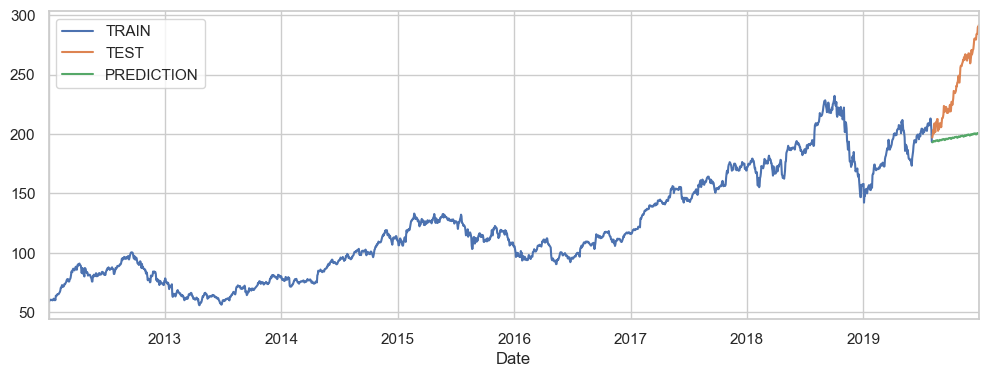

In [285]:
train_data['Close'].plot(legend=True,label='TRAIN')
test_data['Close'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION');

### Tripple Exponential Model not understood the patterns of time Series 

# SARIMA 

In [276]:
# Fit the best model based on AIC
mod_aic = SARIMAX(df['Close'],
                  order=(1, 0, 2),
                  seasonal_order=(0, 0, 2, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
results_aic = mod_aic.fit(disp=False)

# Fit the best model based on BIC
mod_bic = SARIMAX(df['Close'],
                  order=(0, 1, 0),
                  seasonal_order=(0, 0, 2, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
results_bic = mod_bic.fit(disp=False)

# Print the summary of the best models
print(results_aic.summary())
print(results_bic.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2085
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -4442.449
Date:                            Wed, 12 Jun 2024   AIC                           8896.897
Time:                                    11:19:15   BIC                           8930.674
Sample:                                01-03-2012   HQIC                          8909.281
                                     - 12-30-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0009      0.000   3728.972      0.000       1.000       1.001
ma.L1          0.0123      0.015   

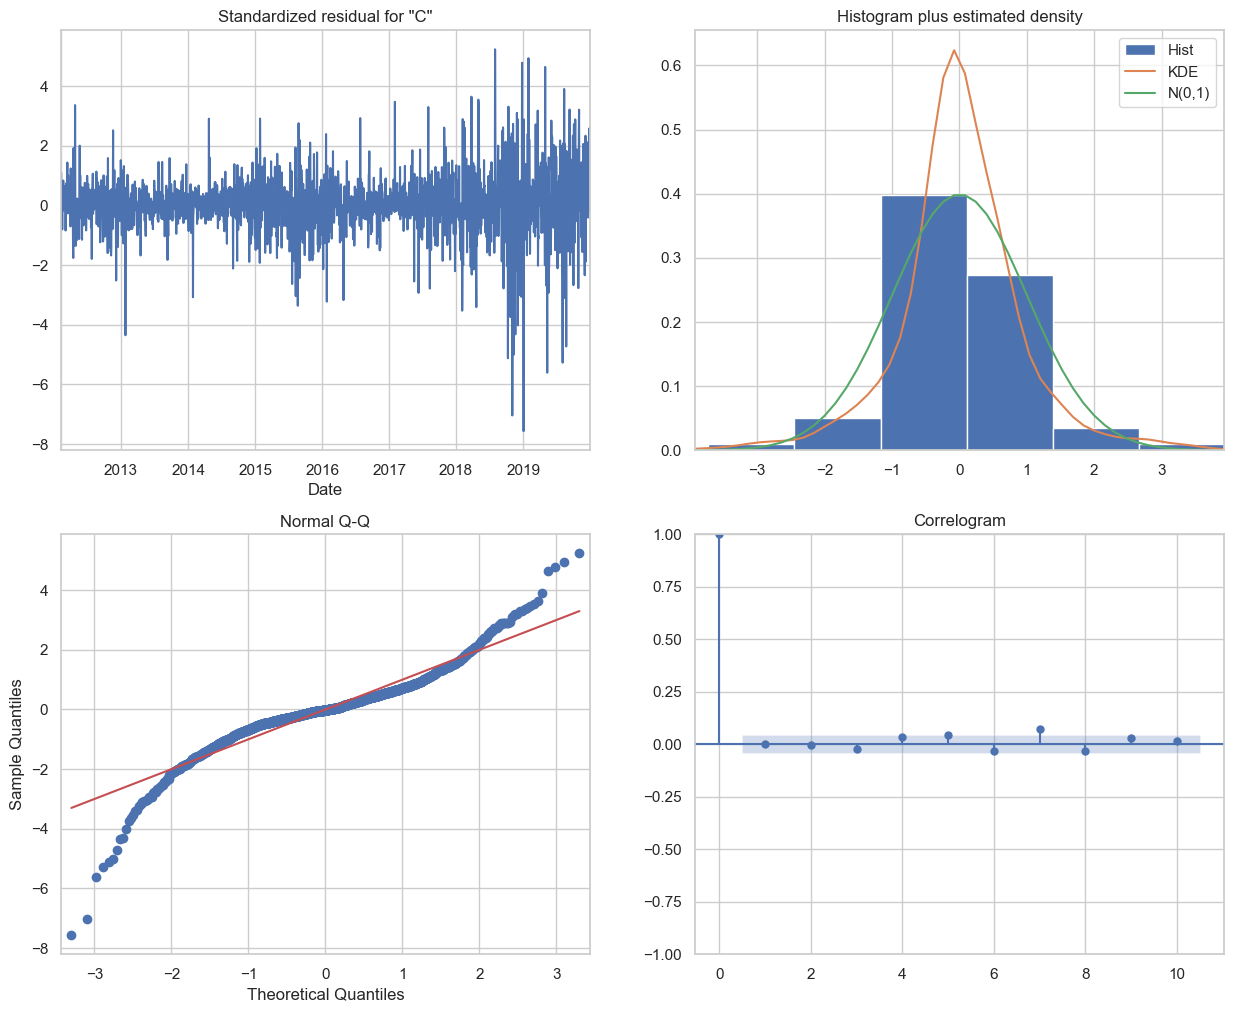

In [277]:
import matplotlib.pyplot as plt

# Plot diagnostics for the best AIC model
results_aic.plot_diagnostics(figsize=(15, 12))
plt.show()


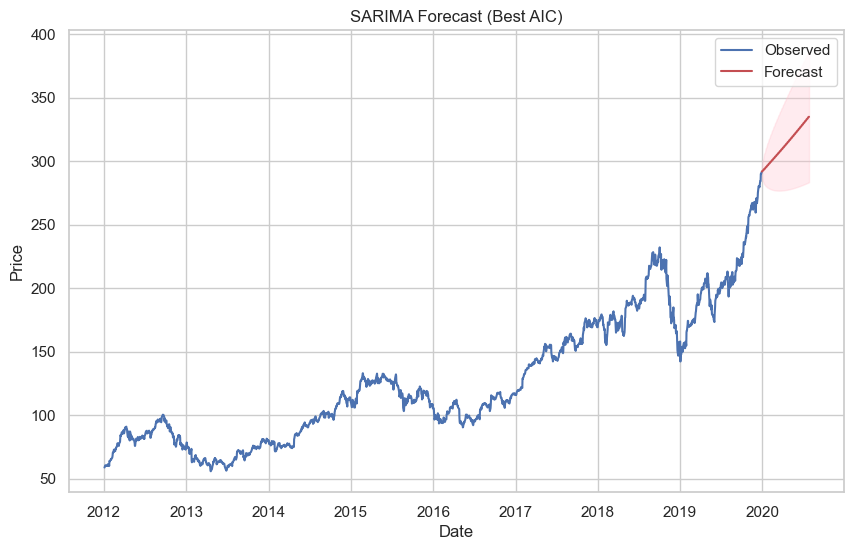

In [278]:
# Forecast with the best AIC model
forecast_aic = results_aic.get_forecast(steps=150)
forecast_ci_aic = forecast_aic.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Observed')
plt.plot(forecast_aic.predicted_mean.index, forecast_aic.predicted_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci_aic.index,
                 forecast_ci_aic.iloc[:, 0],
                 forecast_ci_aic.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast (Best AIC)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# LSTM

In [94]:
df1=df.reset_index()["Close"]

In [95]:
df1

0        58.747143
1        59.062859
2        59.718571
3        60.342857
4        60.247143
           ...    
2080    284.269989
2081    284.269989
2082    289.910004
2083    289.799988
2084    291.519989
Name: Close, Length: 2085, dtype: float64

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_df_1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [97]:
train_len,test_len

(1980, 104)

In [106]:
training_data, testing_data = scaled_df_1[0:train_len],scaled_df_1[train_len:,:1]

In [107]:
training_data

array([[0.01254462],
       [0.01388393],
       [0.01666555],
       ...,
       [0.64752047],
       [0.62881267],
       [0.58350656]])

In [111]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [235]:
time_step=80
x_train,y_train = create_dataset(training_data,time_step)

In [236]:
x_test,y_test = create_dataset(testing_data, time_step)

In [237]:
### reshape input to be [sample , time steps, features ] which is reqired for lstm

In [238]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)

In [239]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [240]:
x_train

array([[[0.01254462],
        [0.01388393],
        [0.01666555],
        ...,
        [0.11933143],
        [0.11056839],
        [0.10979267]],

       [[0.01388393],
        [0.01666555],
        [0.01931386],
        ...,
        [0.11056839],
        [0.10979267],
        [0.10287193]],

       [[0.01666555],
        [0.01931386],
        [0.01890783],
        ...,
        [0.10979267],
        [0.10287193],
        [0.13300327]],

       ...,

       [[0.61438935],
        [0.60730498],
        [0.6069656 ],
        ...,
        [0.64459344],
        [0.65282314],
        [0.64900524]],

       [[0.60730498],
        [0.6069656 ],
        [0.60849278],
        ...,
        [0.65282314],
        [0.64900524],
        [0.66707674]],

       [[0.6069656 ],
        [0.60849278],
        [0.60857764],
        ...,
        [0.64900524],
        [0.66707674],
        [0.64752047]]])

In [241]:
### create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [242]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = "adam")

In [243]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [244]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.0448 - val_loss: 0.0127
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 6.8094e-04 - val_loss: 0.0019
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 6.9722e-04 - val_loss: 0.0045
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 6.1606e-04 - val_loss: 0.0049
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 6.5115e-04 - val_loss: 0.0054
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 6.1140e-04 - val_loss: 0.0037
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 5.3899e-04 - val_loss: 0.0062
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 5.0181e-04 - val_loss: 0.0091
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 5.3883e-04 - val_loss: 0.0063
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 4.5196e-04 - val_loss: 0.0048
Epoch 12/

In [245]:
train_predict = model.predict(x_train)
test_predict= model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [246]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [247]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

132.08494122151512

In [248]:
math.sqrt(mean_squared_error(y_test, test_predict))

274.0910591905109

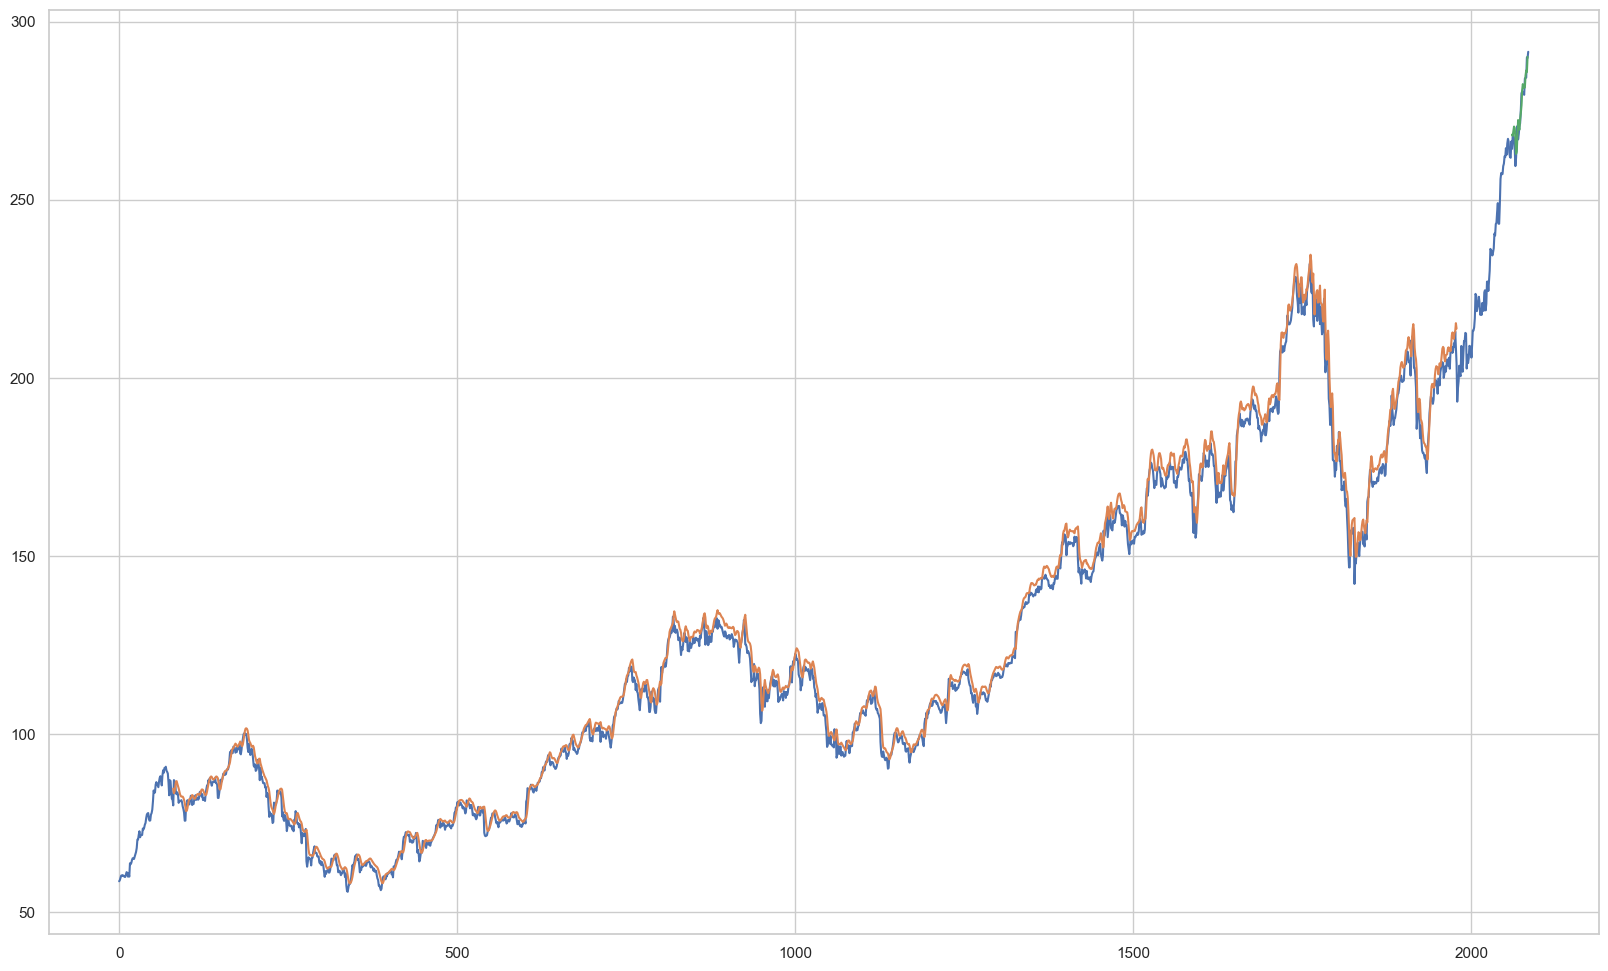

In [280]:
plt.figure(figsize=(20, 12))
look_back = 80
train_predict_plot = numpy.empty_like(scaled_df_1)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:] = train_predict

test_predict_plot = numpy.empty_like(scaled_df_1)
test_predict_plot[:,:] = numpy.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(scaled_df_1)-1,:]= test_predict

plt.plot(scaler.inverse_transform(scaled_df_1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()


In [252]:
len(testing_data)

105

In [253]:
x_input = testing_data[4:].reshape(1,-1)
x_input.shape

(1, 101)

In [254]:
x_input

array([[0.61379545, 0.64981126, 0.62342513, 0.61914059, 0.63933316,
        0.65566543, 0.65570783, 0.66537991, 0.66461636, 0.62295849,
        0.63929076, 0.62940657, 0.63521828, 0.64998092, 0.64883558,
        0.64883558, 0.63593944, 0.65074453, 0.66809488, 0.66801002,
        0.67187038, 0.682603  , 0.71183135, 0.70971028, 0.6912994 ,
        0.69617784, 0.69957156, 0.70835283, 0.70067456, 0.6869724 ,
        0.69117214, 0.68676028, 0.70097148, 0.69613544, 0.69159638,
        0.71344338, 0.71607349, 0.69219028, 0.70008066, 0.72633947,
        0.72655159, 0.71526747, 0.72642433, 0.73940527, 0.76536722,
        0.76392484, 0.76159172, 0.75756163, 0.761422  , 0.76621564,
        0.78360838, 0.78127525, 0.79493489, 0.79663178, 0.80935821,
        0.8198363 , 0.79540153, 0.79527427, 0.81860605, 0.84855562,
        0.85568239, 0.85411282, 0.85457939, 0.86386969, 0.86688171,
        0.8756205 , 0.8746023 , 0.88525012, 0.87748706, 0.89072252,
        0.89640697, 0.89297085, 0.87982018, 0.87

In [255]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [256]:
temp_input

[0.6137954539750792,
 0.6498112577853268,
 0.6234251324867499,
 0.6191405906320242,
 0.6393331636702921,
 0.6556654344715787,
 0.6557078346773597,
 0.66537990915267,
 0.6646163575929931,
 0.6229584926632243,
 0.6392907634645109,
 0.6294065691803283,
 0.6352182820286743,
 0.6499809179984346,
 0.6488355821746361,
 0.6488355821746361,
 0.6359394376247114,
 0.6507445331902362,
 0.6680948798079944,
 0.6680100200064492,
 0.6718703816334135,
 0.6826029957631017,
 0.711831347482188,
 0.7097102766577157,
 0.6912993988698628,
 0.6961778363132991,
 0.6995715623588799,
 0.7083528252671867,
 0.7006745616090218,
 0.6869723974193729,
 0.6911721388625363,
 0.6867602776105006,
 0.7009714775873148,
 0.696135436107518,
 0.6915963784802805,
 0.713443382519495,
 0.7160734891311324,
 0.6921902783111327,
 0.7000806617781696,
 0.7263394676794366,
 0.7265515874883088,
 0.7152674737335496,
 0.7264243274809821,
 0.7394052682003276,
 0.7653672217554264,
 0.7639248426890854,
 0.7615917156878658,
 0.757561630215668

In [257]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.64981126 0.62342513 0.61914059 0.63933316 0.65566543 0.65570783
 0.66537991 0.66461636 0.62295849 0.63929076 0.62940657 0.63521828
 0.64998092 0.64883558 0.64883558 0.63593944 0.65074453 0.66809488
 0.66801002 0.67187038 0.682603   0.71183135 0.70971028 0.6912994
 0.69617784 0.69957156 0.70835283 0.70067456 0.6869724  0.69117214
 0.68676028 0.70097148 0.69613544 0.69159638 0.71344338 0.71607349
 0.69219028 0.70008066 0.72633947 0.72655159 0.71526747 0.72642433
 0.73940527 0.76536722 0.76392484 0.76159172 0.75756163 0.761422
 0.76621564 0.78360838 0.78127525 0.79493489 0.79663178 0.80935821
 0.8198363  0.79540153 0.79527427 0.81860605 0.84855562 0.85568239
 0.85411282 0.85457939 0.86386969 0.86688171 0.8756205  0.8746023
 0.88525012 0.87748706 0.89072252 0.89640697 0.89297085 0.87982018
 0.87481449 0.87383875 0.89331016 0.88448657 0.89954612 0.89954612
 0.89704327 0.88393507 0.86395461 0.87366903 0.88995884 0.91172104
 0.89564342 0.90226115 0.91197556 0.91490265 0.9305561

In [258]:
day_new = np.arange(1,101)
day_pred= np.arange(101,131)

In [259]:
len(scaled_df_1)

2085

In [260]:
df3 = scaled_df_1.tolist()
df3.extend(lst_output)

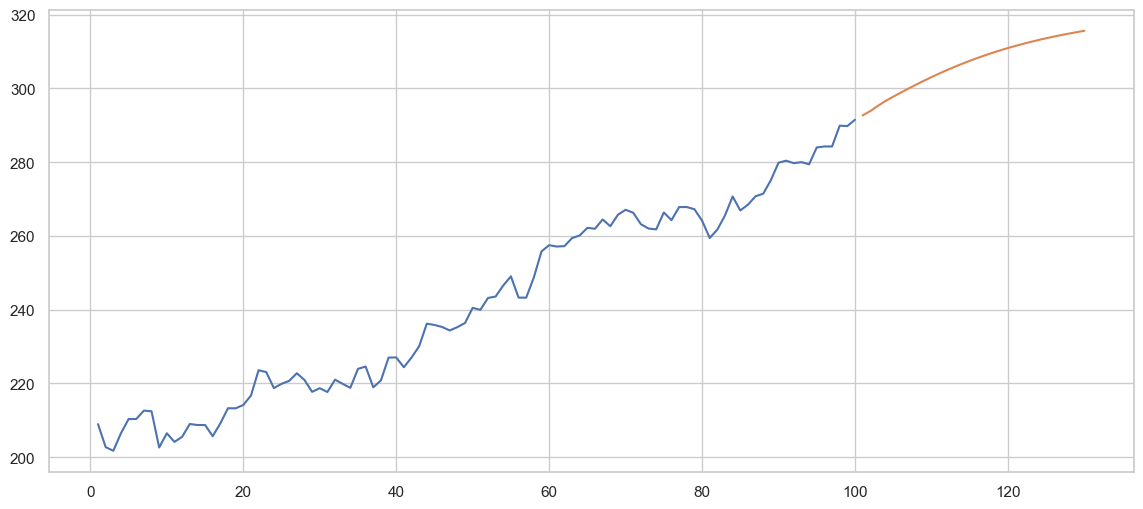

In [261]:
plt.figure(figsize=(14, 6))
plt.plot(day_new,scaler.inverse_transform(scaled_df_1[1985:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

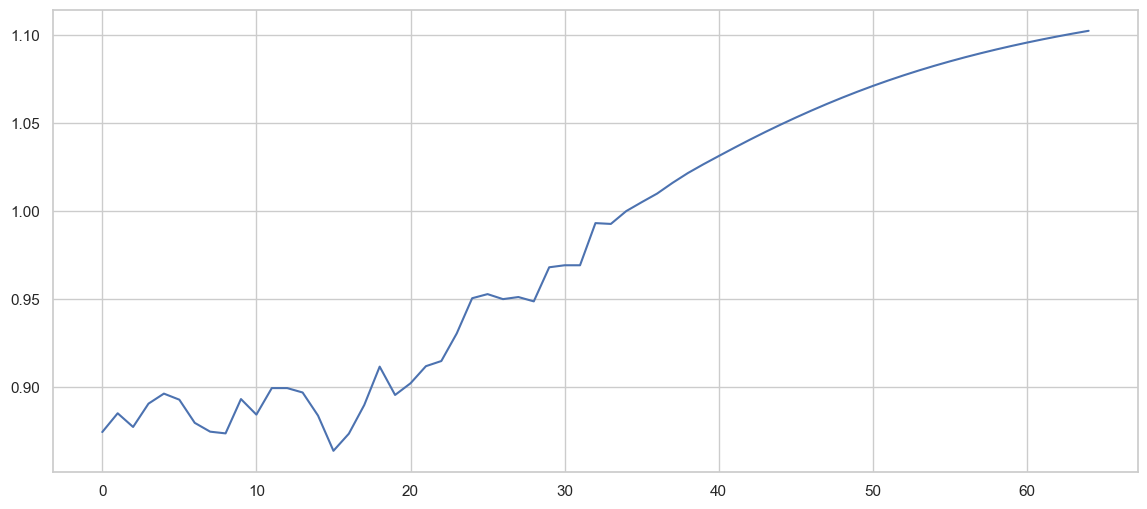

In [262]:
plt.figure(figsize=(14, 6))
df3 = scaled_df_1.tolist()
df3.extend(lst_output)
plt.plot(df3[2050:])

# Next 30 day prediction output 

In [263]:
scaler.inverse_transform(lst_output)

array([[292.70726489],
       [293.85871174],
       [295.29097392],
       [296.60830218],
       [297.77332191],
       [298.88197063],
       [299.97642824],
       [301.04610058],
       [302.0778082 ],
       [303.07076426],
       [304.02825659],
       [304.95042572],
       [305.83552935],
       [306.68216244],
       [307.48965055],
       [308.25813418],
       [308.98817537],
       [309.68070145],
       [310.33700508],
       [310.95860372],
       [311.54729585],
       [312.10496426],
       [312.6333512 ],
       [313.13405846],
       [313.6085473 ],
       [314.05836328],
       [314.48479905],
       [314.88892247],
       [315.27168898],
       [315.63416641]])

In [271]:
import pandas as pd
import numpy as np

# Prediction values (example given by you)
predictions = np.array([
    [292.70726489], [293.85871174], [295.29097392], [296.60830218], [297.77332191],
    [298.88197063], [299.97642824], [301.04610058], [302.0778082], [303.07076426],
    [304.02825659], [304.95042572], [305.83552935], [306.68216244], [307.48965055],
    [308.25813418], [308.98817537], [309.68070145], [310.33700508], [310.95860372],
    [311.54729585], [312.10496426], [312.6333512], [313.13405846], [313.6085473],
    [314.05836328], [314.48479905], [314.88892247], [315.27168898], [315.63416641]
])

# Flatten the predictions array
predictions = predictions.flatten()

# Last date of the dataset
last_date = pd.to_datetime("2019-12-30")

# Generate the date range for the next 30 business days
prediction_dates = pd.date_range(start=last_date, periods=len(predictions) + 1, freq='B', closed='right')

# Create DataFrame
df_predictions = pd.DataFrame(predictions, index=prediction_dates, columns=['Predicted_Close'])

# Display the DataFrame
df_predictions


Predicted_Close
2019-12-31       292.707265
2020-01-01       293.858712
2020-01-02       295.290974
2020-01-03       296.608302
2020-01-06       297.773322
2020-01-07       298.881971
2020-01-08       299.976428
2020-01-09       301.046101
2020-01-10       302.077808
2020-01-13       303.070764
2020-01-14       304.028257
2020-01-15       304.950426
2020-01-16       305.835529
2020-01-17       306.682162
2020-01-20       307.489651
2020-01-21       308.258134
2020-01-22       308.988175
2020-01-23       309.680701
2020-01-24       310.337005
2020-01-27       310.958604
2020-01-28       311.547296
2020-01-29       312.104964
2020-01-30       312.633351
2020-01-31       313.134058
2020-02-03       313.608547
2020-02-04       314.058363
2020-02-05       314.484799
2020-02-06       314.888922
2020-02-07       315.271689
2020-02-10       315.634166

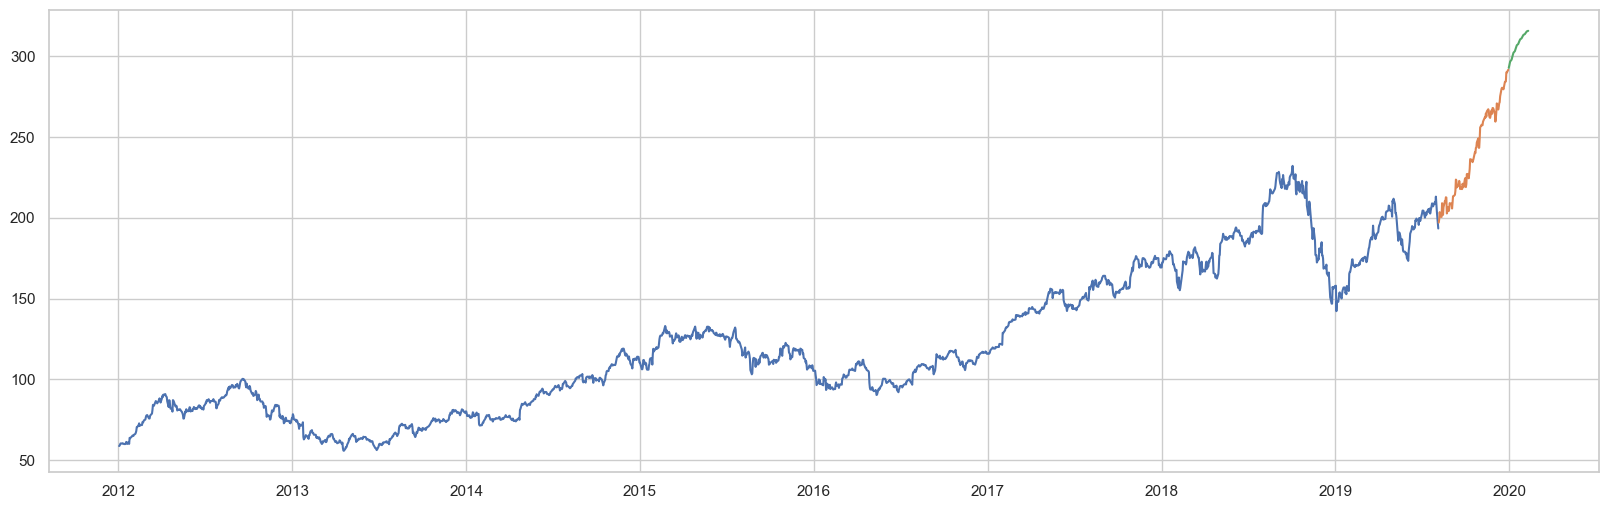

In [273]:
plt.figure(figsize=(20, 6))
plt.plot(train_data["Close"])
plt.plot(test_data["Close"])
plt.plot(df_predictions)
plt.show()

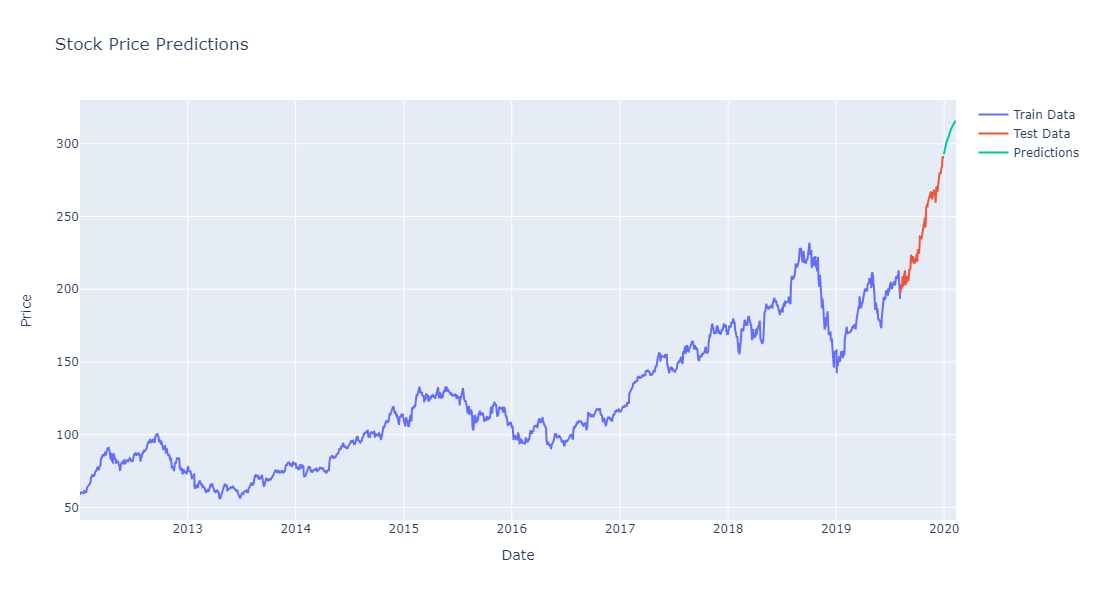

In [275]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1)

# Add the training data to the plot
fig.add_trace(go.Scatter(x=train_data.index, y=train_data["Close"], mode='lines', name='Train Data'))

# Add the testing data to the plot
fig.add_trace(go.Scatter(x=test_data.index, y=test_data["Close"], mode='lines', name='Test Data'))

# Add the predictions to the plot
fig.add_trace(go.Scatter(x=df_predictions.index, y=df_predictions["Predicted_Close"], mode='lines', name='Predictions'))

# Update layout
fig.update_layout(
    title='Stock Price Predictions',
    xaxis_title='Date',
    yaxis_title='Price',
    width=1000,
    height=600
)

# Show the plot
fig.show()